Иванченко Макар Дмитриевич М8О-310Б-23

Ник на Kaggle: Макар (kalane15)

Разведочный анализ данных

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('https://raw.githubusercontent.com/kalane15/Mai-ML/refs/heads/main/lab1/train.csv')


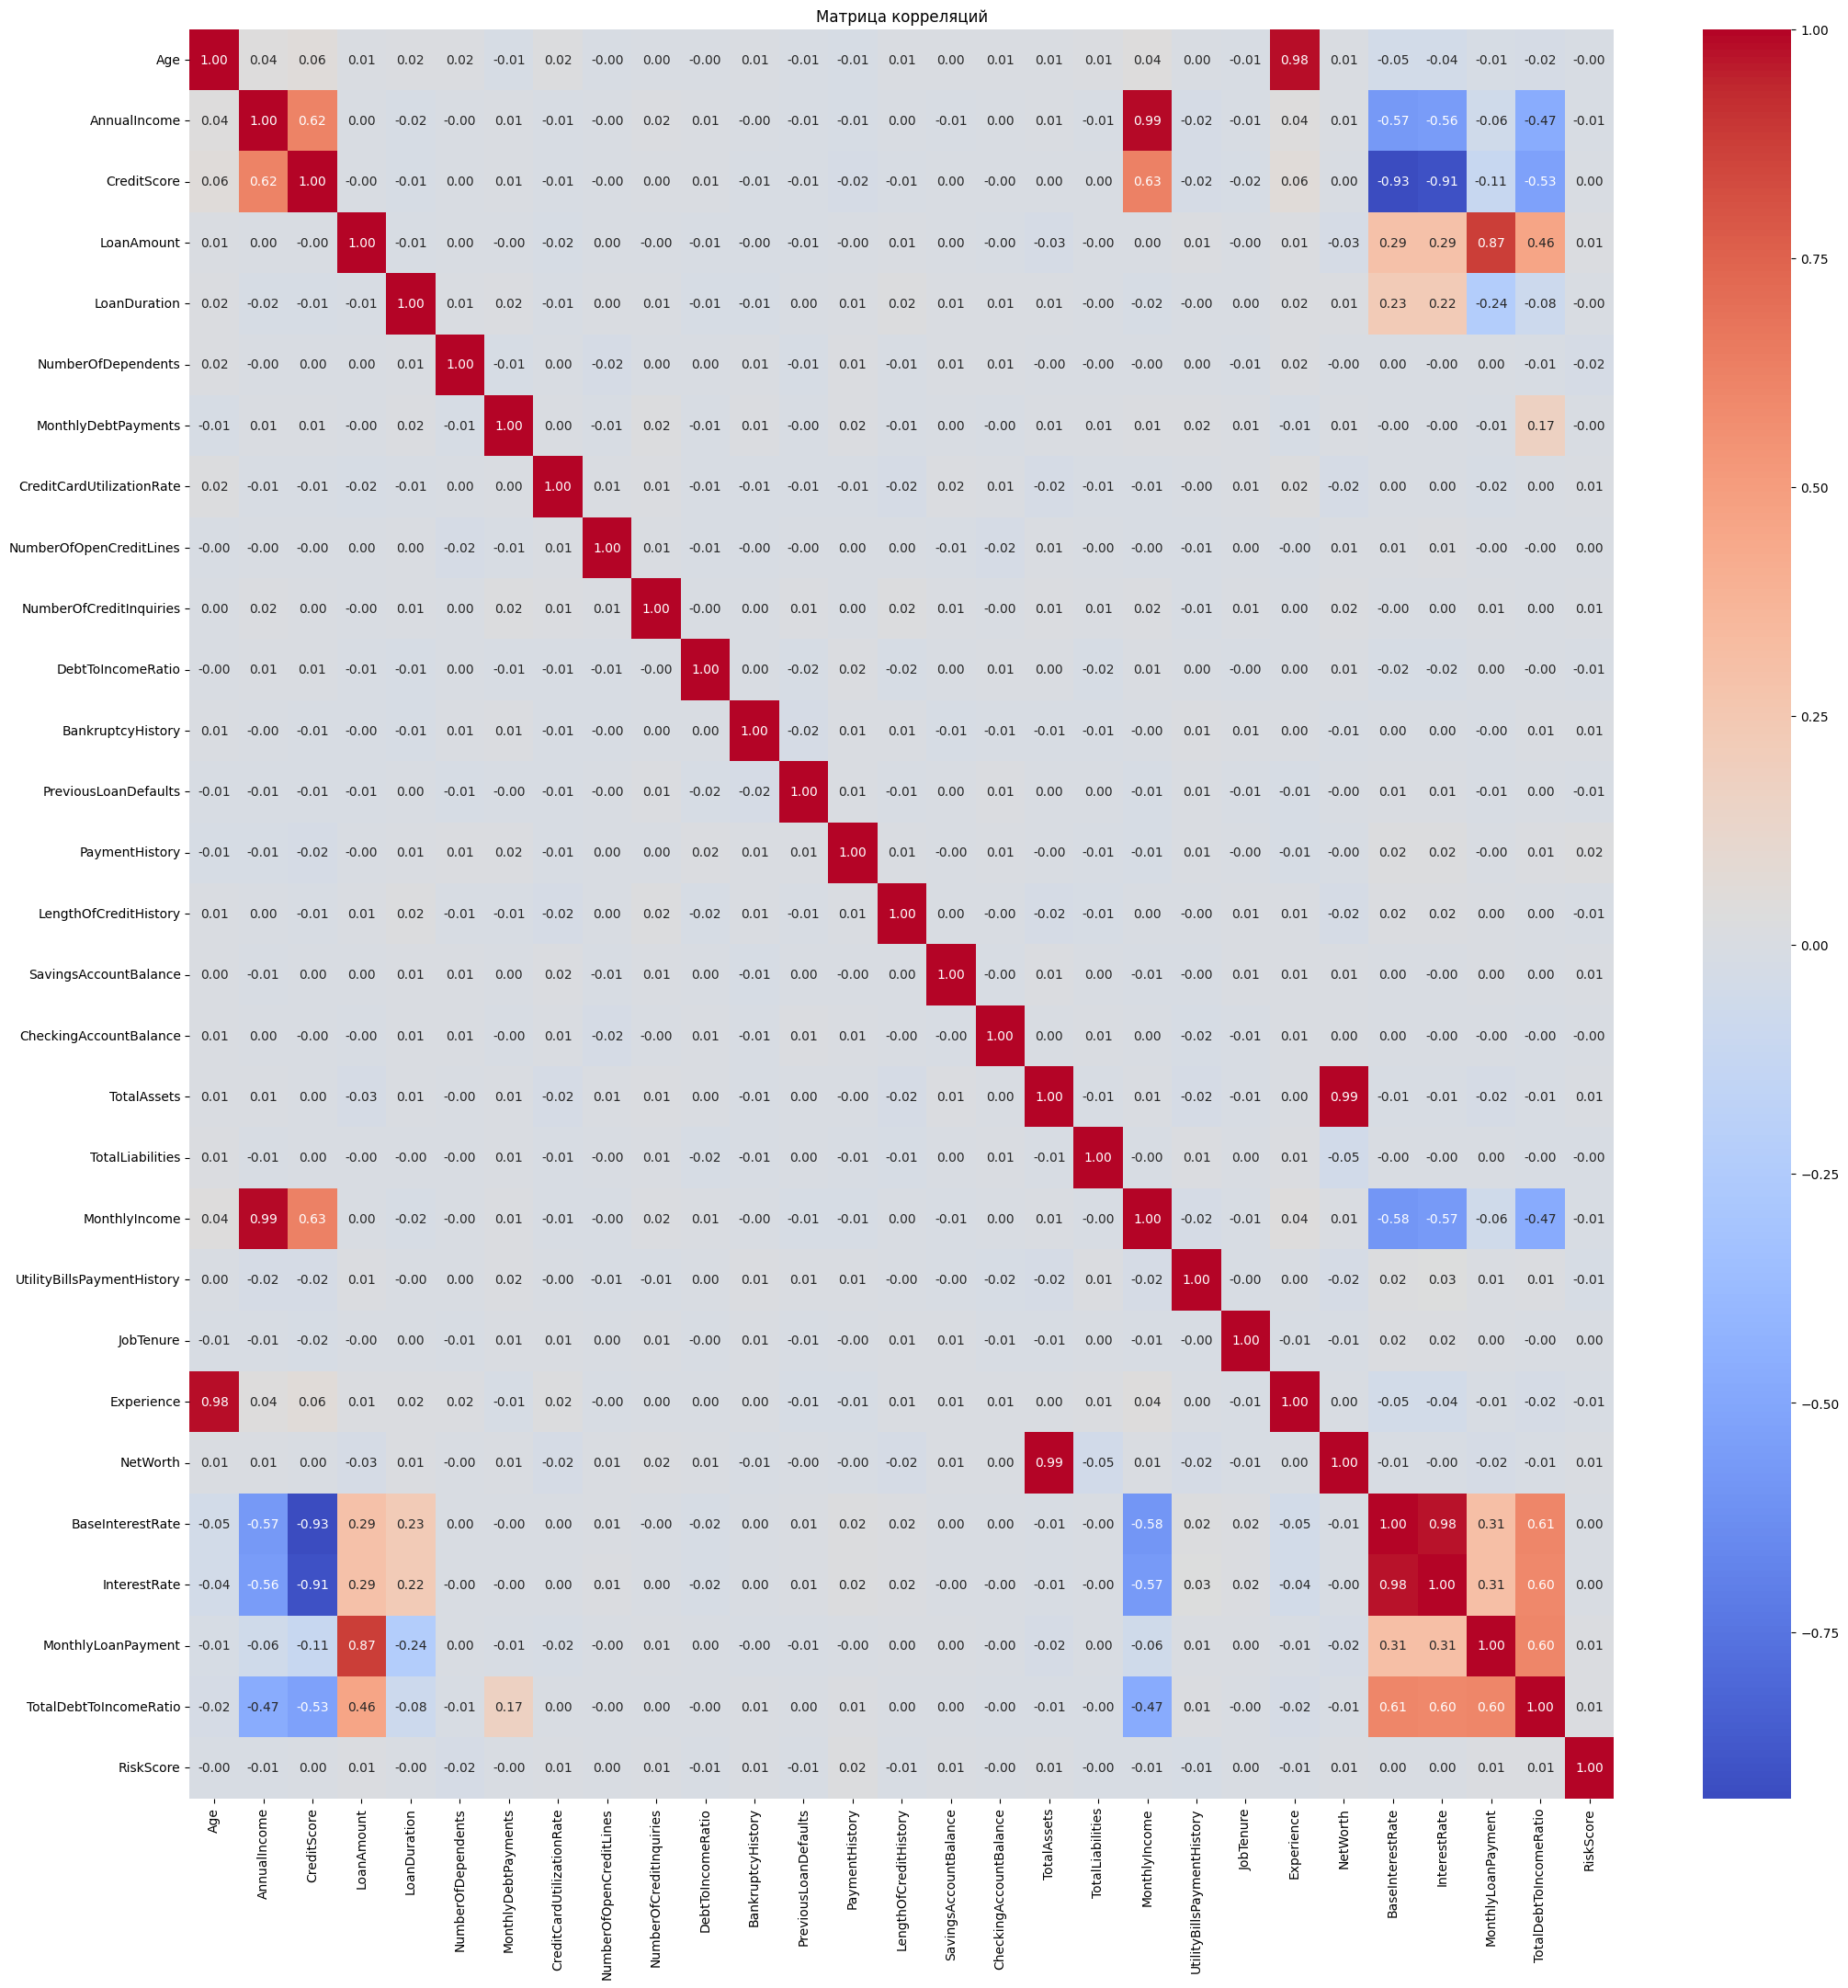

In [ ]:
tmp_df = df.select_dtypes(include=["number"])
corr = tmp_df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Матрица корреляций")
plt.show()

Как видно из матрицы корреляций, среди есть признаков есть мультиколлинеарность. Убедимся в этом, взглянув на зависимости между некоторыми из них

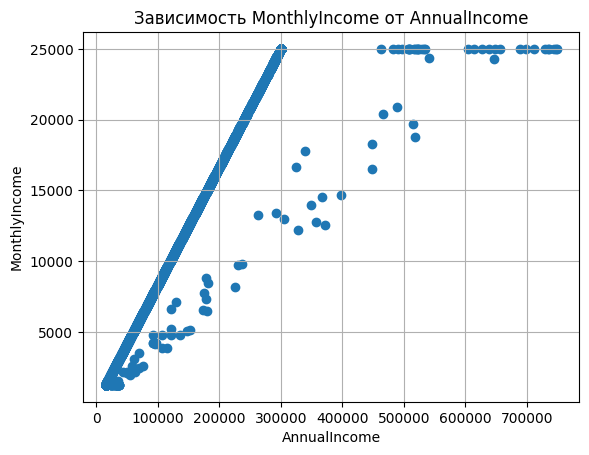

In [ ]:
plt.scatter(df["AnnualIncome"], df["MonthlyIncome"])
plt.xlabel("AnnualIncome")
plt.ylabel("MonthlyIncome")
plt.title("Зависимость MonthlyIncome от AnnualIncome")
plt.grid(True)
plt.show()

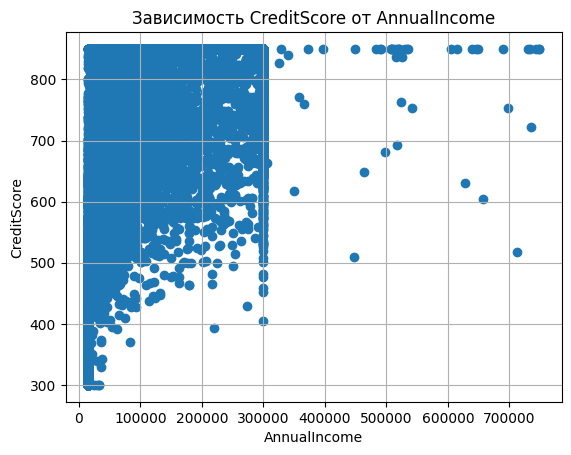

In [ ]:
plt.scatter(df["AnnualIncome"], df["CreditScore"])
plt.xlabel("AnnualIncome")
plt.ylabel("CreditScore")
plt.title("Зависимость CreditScore от AnnualIncome")
plt.grid(True)
plt.show()

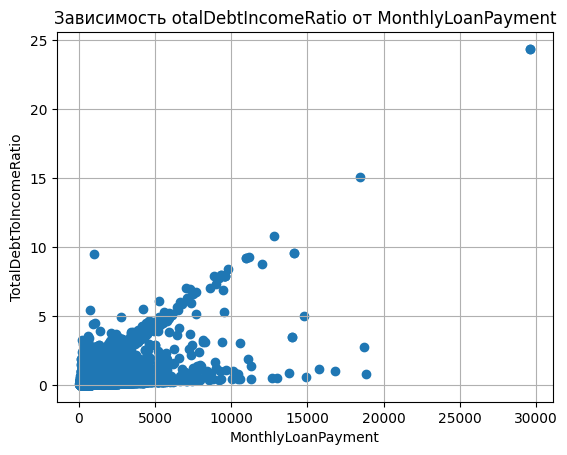

In [ ]:
plt.scatter(df["MonthlyLoanPayment"], df["TotalDebtToIncomeRatio"])
plt.xlabel("MonthlyLoanPayment")
plt.ylabel("TotalDebtToIncomeRatio")
plt.title("Зависимость otalDebtIncomeRatio от MonthlyLoanPayment")
plt.grid(True)
plt.show()

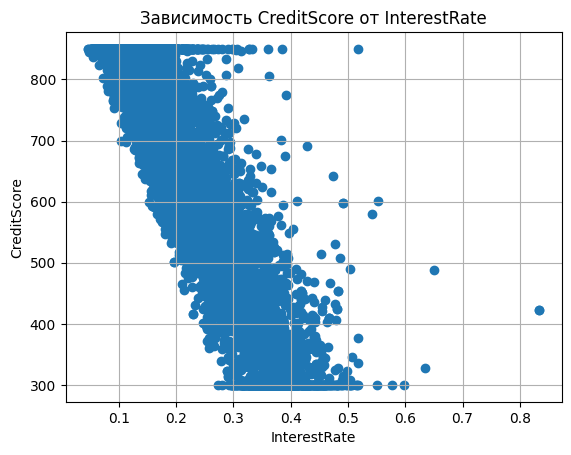

In [ ]:
plt.scatter(df["InterestRate"], df["CreditScore"])
plt.xlabel("InterestRate")
plt.ylabel("CreditScore")
plt.title("Зависимость CreditScore от InterestRate")
plt.grid(True)
plt.show()

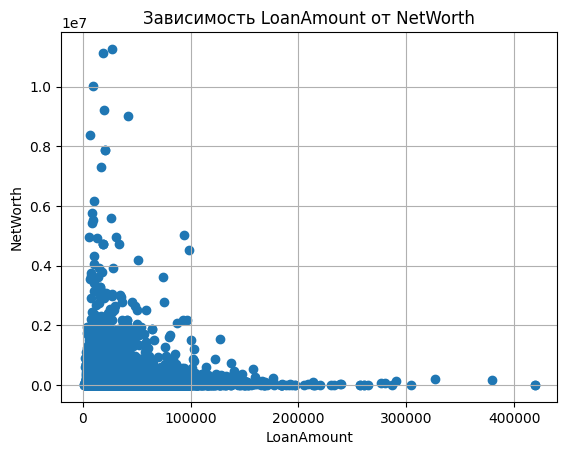

In [ ]:
plt.scatter(df["LoanAmount"], df["NetWorth"])
plt.xlabel("LoanAmount")
plt.ylabel("NetWorth")
plt.title("Зависимость LoanAmount от NetWorth")
plt.grid(True)
plt.show()

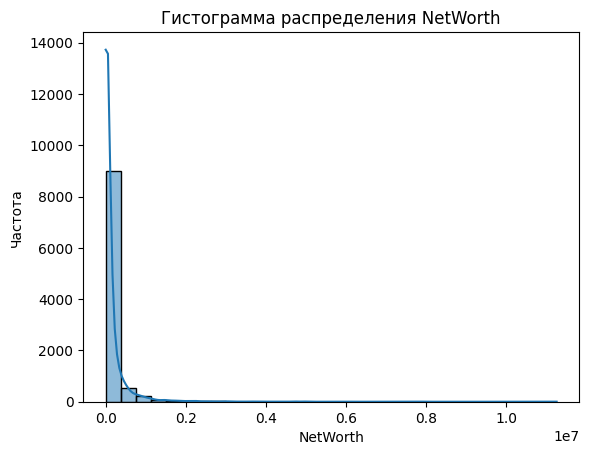

In [ ]:
sns.histplot(df["NetWorth"], bins=30, kde=True)  # kde=True добавляет график плотности
plt.xlabel("NetWorth")
plt.ylabel("Частота")
plt.title("Гистограмма распределения NetWorth")
plt.show()

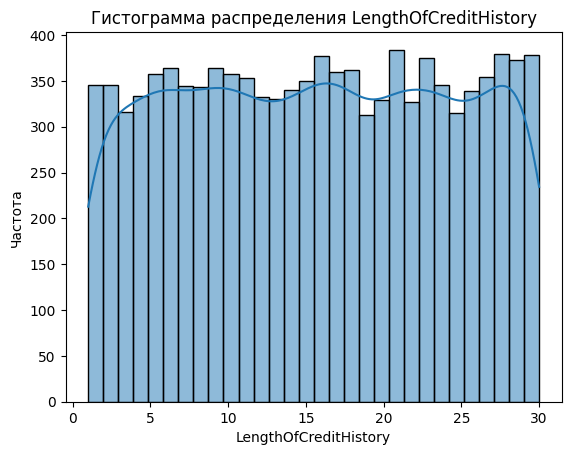

In [ ]:
column = "LengthOfCreditHistory"
sns.histplot(df[f"{column}"], bins=30, kde=True)  # kde=True добавляет график плотности
plt.xlabel(f"{column}")
plt.ylabel("Частота")
plt.title(f"Гистограмма распределения {column}")
plt.show()

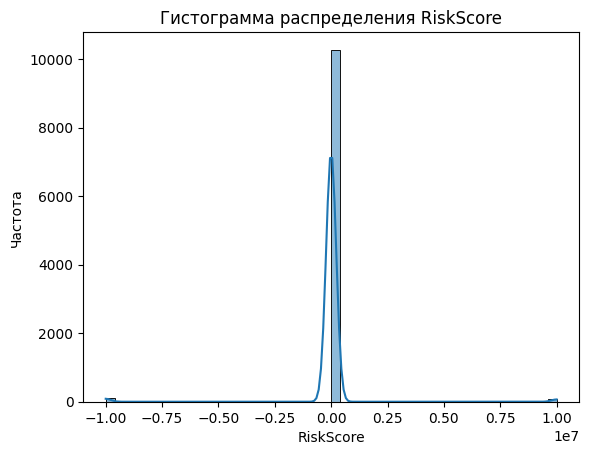

In [ ]:
column = "RiskScore"
sns.histplot(df[f"{column}"], bins=50, kde=True)  # kde=True добавляет график плотности
plt.xlabel(f"{column}")
plt.ylabel("Частота")
plt.title(f"Гистограмма распределения {column}")
plt.show()

Есть какие-то аномальные значения, попробуем построить без них

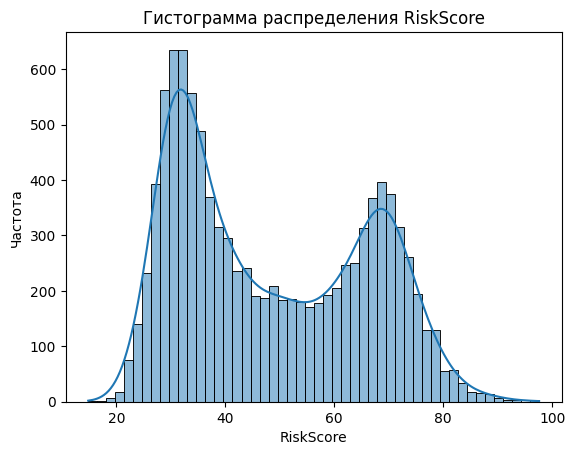

In [ ]:
column = "RiskScore"
df = df[df['RiskScore'] > 0]
df = df[df['RiskScore'] < 100]
sns.histplot(df[f"{column}"], bins=50, kde=True)  # kde=True добавляет график плотности
plt.xlabel(f"{column}")
plt.ylabel("Частота")
plt.title(f"Гистограмма распределения {column}")
plt.show()

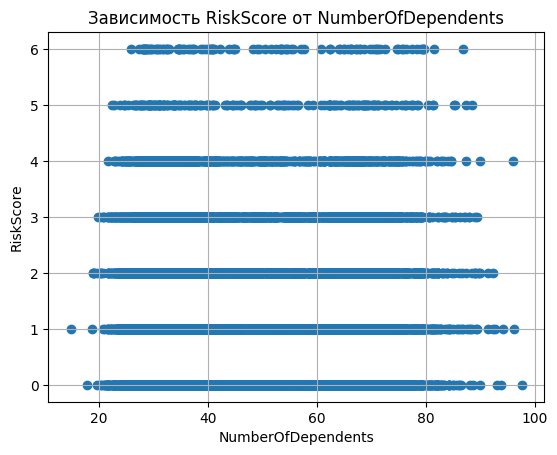

In [ ]:
col1 = 'RiskScore'
col2 = 'NumberOfDependents'
plt.scatter(df[f"{col1}"], df[f"{col2}"])
plt.xlabel(f"{col2}")
plt.ylabel(f"{col1}")
plt.title(f"Зависимость {col1} от {col2}")
plt.grid(True)
plt.show()

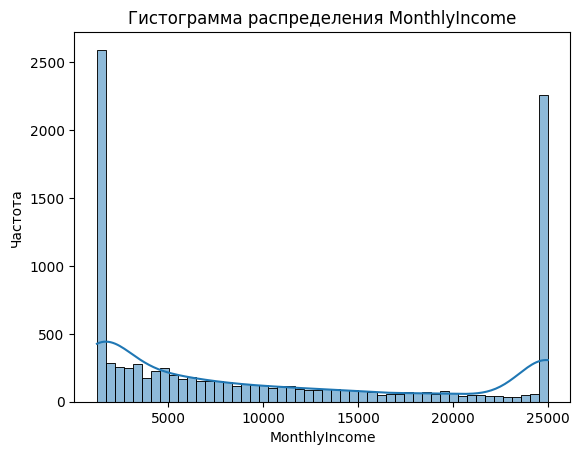

In [ ]:
column = "MonthlyIncome"
df = df[df['RiskScore'] > 0]
df = df[df['RiskScore'] < 100]
sns.histplot(df[f"{column}"], bins=50, kde=True)  # kde=True добавляет график плотности
plt.xlabel(f"{column}")
plt.ylabel("Частота")
plt.title(f"Гистограмма распределения {column}")
plt.show()

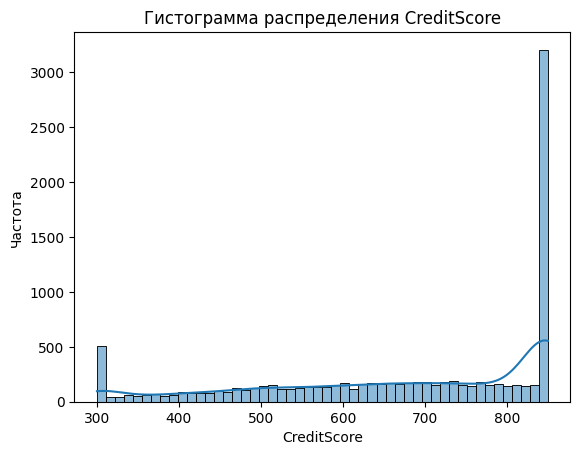

In [ ]:
column = "CreditScore"
df = df[df['RiskScore'] > 0]
df = df[df['RiskScore'] < 100]
sns.histplot(df[f"{column}"], bins=50, kde=True)  # kde=True добавляет график плотности
plt.xlabel(f"{column}")
plt.ylabel("Частота")
plt.title(f"Гистограмма распределения {column}")
plt.show()

Таким образом, имеет смысл применить логарифмирование к признакам, чтобы снизить влияние выбросов и уменьшить масщтаб признаков. Также есть смысл удалить некоторые столбцы, чтобы избежать мультиколлинеарности.

**Нормализация**

In [ ]:
def normalize_min_max(df):
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        min_val = df[col].min()
        max_val = df[col].max()

        df[col] = (df[col] - min_val) / (max_val - min_val)

    return df

def normalize_z_score(df, mean, std):
    std_values = std
    df = df.loc[:, std_values != 0]
    df = (df - mean) / std
    return df

**Класс линейной регрессии**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('https://raw.githubusercontent.com/kalane15/Mai-ML/refs/heads/main/lab1/train.csv')
df = df.select_dtypes("number")

In [ ]:
import numpy as np
from enum import Enum

class ModelLearnWay(Enum):
    GD = 0
    SGD = 1
    ANALYTICAL = 2

class MyLinearModel:

    def __init__(self, lr=0.01, iters=20000, b=0, way=ModelLearnWay.GD):
        self.lr = lr
        self.iters = iters
        self.w = None
        self.b = b
        self.way = way

    def fit(self, x_train, y_train):
        if self.way == ModelLearnWay.GD:
            self.fit_gd(x_train, y_train)
        elif self.way == ModelLearnWay.SGD:
            self.fit_sgd(x_train, y_train)
        elif self.way == ModelLearnWay.ANALYTICAL:
            self.fit_analytical(x_train, y_train)

    def fit_gd(self, x_train, y_train):
        samples, features = x_train.shape
        self.w = np.zeros(features)
        self.b = 0

        for _ in range(self.iters):
            preds = np.dot(x_train, self.w) + self.b

            dw = (1 / samples) * np.dot(x_train.T, (preds - y_train))
            db = (1 / samples) * np.sum(preds - y_train)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def fit_sgd(self, x_train, y_train, batch_size=1):
        samples, features = x_train.shape
        self.w = np.zeros(features)
        self.b = 0

        rng = np.random.default_rng(seed=42)

        for _ in range(self.iters):
            indices = rng.choice(np.arange(samples), size=batch_size, replace=False)

            x_batch = x_train[indices]
            y_batch = y_train[indices]

            preds = np.dot(x_batch, self.w) + self.b

            dw = np.dot(x_batch.T, (preds - y_batch)) / batch_size
            db = np.sum(preds - y_batch) / batch_size

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def fit_analytical(self, x_train, y_train):
        X_b = np.hstack([np.ones((x_train.shape[0], 1)), x_train])  # Добавляем столбец для bias
        self.w = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y_train

    def predict(self, x_test):
      if self.way == ModelLearnWay.ANALYTICAL:
          X_b = np.hstack([np.ones((x_test.shape[0], 1)), x_test])  # добавляем bias
          return X_b @ self.w
      else:
          return np.dot(x_test, self.w) + self.b


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from enum import Enum

np.random.seed(42)
X = np.random.rand(200, 5)
y = X @ np.array([1.5, -2.0, 3.0, 0.5, -1.0]) + 2 + np.random.randn(200) * 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_analytical = MyLinearModel(way=ModelLearnWay.ANALYTICAL)
model_analytical.fit(X_train, y_train)
y_pred_analytical = model_analytical.predict(X_test)

model_gd = MyLinearModel(way=ModelLearnWay.GD, lr=0.1, iters=5000)
model_gd.fit(X_train, y_train)
y_pred_gd = model_gd.predict(X_test)

model_sgd = MyLinearModel(way=ModelLearnWay.SGD, lr=0.01, iters=10000)
model_sgd.fit(X_train, y_train)
y_pred_sgd = model_sgd.predict(X_test)

sklearn_lr = LinearRegression()
sklearn_lr.fit(X_train, y_train)
y_pred_lr = sklearn_lr.predict(X_test)

sklearn_sgd = SGDRegressor(max_iter=10000, eta0=0.01, learning_rate='constant', random_state=42)
sklearn_sgd.fit(X_train, y_train)
y_pred_sgd_sklearn = sklearn_sgd.predict(X_test)

print("MSE (Analytical - MyLinearModel):", mean_squared_error(y_test, y_pred_analytical))
print("MSE (GD - MyLinearModel):", mean_squared_error(y_test, y_pred_gd))
print("MSE (SGD - MyLinearModel):", mean_squared_error(y_test, y_pred_sgd))
print("MSE (Sklearn LinearRegression):", mean_squared_error(y_test, y_pred_lr))
print("MSE (Sklearn SGDRegressor):", mean_squared_error(y_test, y_pred_sgd_sklearn))

MSE (Analytical - MyLinearModel): 0.008641870784279661
MSE (GD - MyLinearModel): 0.008641870781068184
MSE (SGD - MyLinearModel): 0.008597987651703339
MSE (Sklearn LinearRegression): 0.008641870784279712
MSE (Sklearn SGDRegressor): 0.010596558249494459


**Кросс валидация**

In [ ]:
class MyCrossValidation:
    @staticmethod
    def k_fold_cross_validation(model, x, y, k=5):
        samples = len(x)

        indices = np.arange(samples)
        np.random.shuffle(indices)

        fold_size = samples // k
        mse_scores = []

        for i in range(k):
            test_indices = indices[i * fold_size: (i + 1) * fold_size]
            train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

            x_train, x_test = x[train_indices], x[test_indices]
            y_train, y_test = y[train_indices], y[test_indices]

            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)

            mse = np.mean((y_test - y_pred) ** 2)
            mse_scores.append(mse)

        avg_mse = np.mean(mse_scores)
        return avg_mse

    @staticmethod
    def leave_one_out_cross_validation(model, x, y):
        return MyCrossValidation.k_fold_cross_validation(model, x, y, len(x))

np.random.seed(42)
X = np.random.rand(100, 3)
y = X.dot([2, -3, 1]) + 5 + np.random.randn(100) * 0.1

model = LinearRegression()

k_fold_mse = MyCrossValidation.k_fold_cross_validation(model, X, y, k=5)
print(f'Average MSE for k-fold cross-validation (k=5): {k_fold_mse}')

loo_mse = MyCrossValidation.leave_one_out_cross_validation(model, X, y)
print(f'Average MSE for Leave-One-Out Cross-Validation: {loo_mse}')

Average MSE for k-fold cross-validation (k=5): 0.010540377579091863
Average MSE for Leave-One-Out Cross-Validation: 0.009962216632720225


**Метрики**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def mse_manual(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae_manual(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_manual(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

def mape_manual(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

np.random.seed(42)
X = np.random.rand(100, 3)
y = X.dot([2, -3, 1]) + 5 + np.random.randn(100) * 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred)
mae_sklearn = mean_absolute_error(y_test, y_pred)
r2_sklearn = r2_score(y_test, y_pred)
mape_sklearn = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mse_manual_result = mse_manual(y_test, y_pred)
mae_manual_result = mae_manual(y_test, y_pred)
r2_manual_result = r2_manual(y_test, y_pred)
mape_manual_result = mape_manual(y_test, y_pred)

print("MSE (sklearn):", mse_sklearn)
print("MSE (manual):", mse_manual_result)

print("\nMAE (sklearn):", mae_sklearn)
print("MAE (manual):", mae_manual_result)

print("\nR2 (sklearn):", r2_sklearn)
print("R2 (manual):", r2_manual_result)

print("\nMAPE (sklearn):", mape_sklearn)
print("MAPE (manual):", mape_manual_result)


MSE (sklearn): 0.020173924806103076
MSE (manual): 0.020173924806103076

MAE (sklearn): 0.11043799150572838
MAE (manual): 0.11043799150572838

R2 (sklearn): 0.9807134157421387
R2 (manual): 0.9807134157421387

MAPE (sklearn): 2.557561447762376
MAPE (manual): 2.557561447762376


**Регуляризация**

In [ ]:
import numpy as np

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


class MyLinearRegressionWithRegularization:
    def __init__(self, alpha=0.01, regularization_type='L2', p=2, l1_ratio=0.5, lambda_reg=0.1, iterations=1000):
        self.alpha = alpha
        self.regularization_type = regularization_type
        self.p = p
        self.l1_ratio = l1_ratio
        self.lambda_reg = lambda_reg
        self.iterations = iterations
        self.weights = None
        self.bias = 0
        self.scaler = StandardScaler()

    def fit(self, X, y):
        X_norm = self.scaler.fit_transform(X)
        m, n = X_norm.shape

        if self.regularization_type == 'L2':
            I = np.eye(n)
            XTX = X_norm.T @ X_norm
            XTy = X_norm.T @ y
            self.weights = np.linalg.inv(XTX + self.lambda_reg * I) @ XTy
            self.bias = np.mean(y) - np.mean(X_norm @ self.weights)
            return

        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.iterations):
            preds = X_norm @ self.weights + self.bias
            errors = preds - y

            dw = (2 / m) * (X_norm.T @ errors)
            db = (2 / m) * np.sum(errors)

            if self.regularization_type == 'L1':
                dw += self.lambda_reg * np.sign(self.weights)
            elif self.regularization_type == 'Lp':
                dw += self.lambda_reg * self.p * np.sign(self.weights) * np.abs(self.weights) ** (self.p - 1)
            elif self.regularization_type == 'L1+L2':
                dw += self.lambda_reg * (self.l1_ratio * np.sign(self.weights) + (1 - self.l1_ratio) * 2 * self.weights)

            self.weights -= self.alpha * dw
            self.bias -= self.alpha * db

    def predict(self, X):
        X_norm = self.scaler.transform(X)
        return X_norm @ self.weights + self.bias


np.random.seed(42)
X = np.random.rand(100, 3)
y = X.dot([2, -3, 1]) + 5 + np.random.randn(100) * 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lambda_reg = 1.0
iterations = 100
alpha = 0.1

l1_model = MyLinearRegressionWithRegularization(regularization_type='L1', lambda_reg=lambda_reg, alpha=alpha,
                                                iterations=iterations)
l2_model = MyLinearRegressionWithRegularization(regularization_type='L2', lambda_reg=lambda_reg)
lp_model = MyLinearRegressionWithRegularization(regularization_type='Lp', lambda_reg=lambda_reg, p=3, alpha=alpha,
                                                iterations=iterations)
l1_l2_model = MyLinearRegressionWithRegularization(regularization_type='L1+L2', lambda_reg=lambda_reg, alpha=alpha,
                                                   l1_ratio=0.5, iterations=iterations)

l1_model.fit(X_train, y_train)
l2_model.fit(X_train, y_train)
lp_model.fit(X_train, y_train)
l1_l2_model.fit(X_train, y_train)

l1_pred = l1_model.predict(X_test)
l2_pred = l2_model.predict(X_test)
lp_pred = lp_model.predict(X_test)
l1_l2_pred = l1_l2_model.predict(X_test)

lasso_model = Lasso(alpha=lambda_reg)
ridge_model = Ridge(alpha=lambda_reg)
elasticnet_model = ElasticNet(alpha=lambda_reg, l1_ratio=0.5)

lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elasticnet_model.fit(X_train, y_train)

lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
elasticnet_pred = elasticnet_model.predict(X_test)

print("MSE (L1 - My Implementation):", mean_squared_error(y_test, l1_pred))
print("MSE (L2 - My Implementation):", mean_squared_error(y_test, l2_pred))
print("MSE (Lp - My Implementation):", mean_squared_error(y_test, lp_pred))
print("MSE (L1+L2 - My Implementation):", mean_squared_error(y_test, l1_l2_pred))

print("\nMSE (L1 - Sklearn Lasso):", mean_squared_error(y_test, lasso_pred))
print("MSE (L2 - Sklearn Ridge):", mean_squared_error(y_test, ridge_pred))
print("MSE (L1+L2 - Sklearn ElasticNet):", mean_squared_error(y_test, elasticnet_pred))


MSE (L1 - My Implementation): 0.5288512136497586
MSE (L2 - My Implementation): 0.020850648974107346
MSE (Lp - My Implementation): 0.21571813028327808
MSE (L1+L2 - My Implementation): 0.3866973660263472

MSE (L1 - Sklearn Lasso): 1.0607978057641247
MSE (L2 - Sklearn Ridge): 0.04099469390652604
MSE (L1+L2 - Sklearn ElasticNet): 1.0607978057641247
